In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gender_submission.csv', 'test.csv', 'train.csv']


In [50]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization buld on top of matplotlib
%matplotlib inline

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [37]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
survived_train = df_train.Survived

# combine = [df_train, df_test]
# combine.info() # 'list' object has no attribute 'info'

data = pd.concat([df_train.drop(['Survived'], axis=1), df_test])
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [42]:
# Numerical values, fill with median in case of outliers; useful when distribution of data is skewed
# Skewed left means outlier on left
data['Age'] = data.Age.fillna(data.Age.median()) # Age is pretty normal...
print(data.Age.median())
print(data.Age.mean())
data['Fare'] = data.Fare.fillna(data.Fare.median())
print(data.Fare.median())
print(data.Fare.mean())

28.0
29.50318563789152
14.4542
33.28108563789156


In [29]:
# df_test['Survived'] = 0 # Mostly dead
# df_test['Survived'] = df_test.Sex == 'female' # Females mostly survived
# df_test.head()

In [39]:
# Sex column replaced, will throw error after cell has been run once bc the 'Sex' column won't exist anymore
# drop_first drops the first column colums...the data can be inferred from the others?
data = pd.get_dummies(data, columns=['Sex'], drop_first=True) 
data.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [40]:
data = data[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp
0,1,7.2500,22.0,3,1
1,0,71.2833,38.0,1,1
2,0,7.9250,26.0,3,0
3,0,53.1000,35.0,1,1
4,1,8.0500,35.0,3,0


In [45]:
data_train = data.iloc[:891]
data_test = data.iloc[891:]

In [48]:
# Data frame to array
X = data_train.values
test = data_test.values
y = survived_train.values

In [51]:
clf = tree.DecisionTreeClassifier(max_depth=3) # Look into bias-variance tradeoff, how to choose overfitting/underfitting
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
Y_pred = clf.predict(test)
df_test['Survived'] = Y_pred # Bracket notation will create the column

In [ ]:
# import graphviz
# dot_data = tree.export_graphviz(clf, out_file=None) # DOT is the graphviz format
# graph = graphviz.Source(dot_data)
# graph.render("Survived")

In [59]:
# Splits randomly
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y) #https://stackoverflow.com/a/38889389

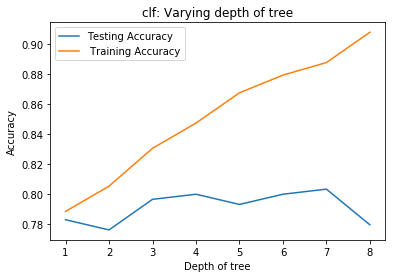

In [63]:
dep = np.arange(1,9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i,k in enumerate(dep):
    clf = tree.DecisionTreeClassifier(max_depth=k)
    clf.fit(X_train,y_train)
    train_accuracy[i] = clf.score(X_train, y_train) # Accuracy on training set bc the model won't fit it 100%
    test_accuracy[i] = clf.score(X_test, y_test)
    
# Matlibplot
plt.title("clf: Varying depth of tree")
plt.plot(dep, test_accuracy, label = "Testing Accuracy")
plt.plot(dep, train_accuracy, label = " Training Accuracy")
plt.legend() # Shows legend
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.show()    